# TP LMS


In [2]:
import numpy as np
from scipy import signal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz
from scipy.linalg import solve_toeplitz
from scipy.linalg import inv 
from scipy.linalg import eigvals

In [3]:
path_data = "/content/drive/Shared drives/PASA/TP LMS/co2_emission.csv"
def get_avb_countries(path=path_data):
  """
  Prints a list of all available countries included in the dataset
  """
  co2_df = pd.read_csv(path)
  print(co2_df.Entity.unique())

def get_emissions(country, path = path_data):
  """
  Function to extract CO2 emissions from a particular country

  Examples
  --------
  years, emissions = get_emissions("Argetina", path)

  """
  co2_df = pd.read_csv(path)
  co2_country = None
  co2_country = co2_df[co2_df.Entity == country]
  if co2_country.empty:
    print(f"The country {country} is not available")
    return [],[]
  else:
    return co2_country["Year"].to_numpy(), co2_country["Annual CO₂ emissions (tonnes )"].to_numpy()

In [4]:
years , emmisions = get_emissions("Argentina")

131

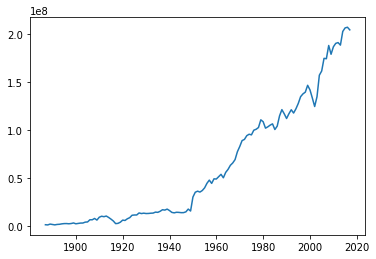

In [5]:
plt.plot(years,emmisions)
len(emmisions)

In [ ]:
plt.plot(years[0:156],emmisions[0:156]);
plt.plot(years[0:156],out[1:]);

In [ ]:
plt.plot(emmisions[0:100]-out[1:101])

# LO DE ACA ABAJO ANDAAA, NO LO TOQUEN PORQUE LES REVIENTO LA JETA

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

np.random.seed(616)


class VSNLMS:
	def __init__(self, mu, mu_max, mu_min, m0, m1, alpha, delta=0):
		self.mu = mu
		self.count_mu_values = 0
		self.mu_max = mu_max
		self.mu_min = mu_min
		self.alpha = alpha
		self.m0 = m0
		self.m1 = m1
		self.prev_sign = 0
		self.delta = delta
		self.prev_grad = []
		return

	def calcNewCoef(self, a_n, signal, error):
		grad = np.array(signal) * error
		if len(self.prev_grad) != 0:
			if np.sum(np.sign(grad) != self.prev_grad) >= self.m0 and self.mu > self.mu_min:
				self.mu /= self.alpha
			elif np.sum(np.sign(grad) == self.prev_grad) >= self.m1 and self.mu < self.mu_max:
				self.mu *= self.alpha
		self.prev_grad = np.sign(grad)
		return a_n + self.mu * grad / (np.dot(signal, signal) + self.delta)  # NLMS

	def getMu(self):
		return self.mu


class AdaptativeFilter:
	def __init__(self, N, mu, mu_max, mu_min, m0_per,m1_per, alpha=2, delta=0):  # N es el orden del filtro de wiener
		self.N = N
		self.w = np.random.randn(N)
		self.mu = mu
		m0 = m0_per * N
		m1 = m1_per * N
		self.vsnlms = VSNLMS(self.mu, mu_max, mu_min, m0, m1, alpha, delta)
		self.inp_signal = list(np.zeros(N))
		self.err = 1
		return

	def fit(self, input, desired):
		self.inp_signal = list(np.zeros(self.N))
		self.err = 1
		for x,d in zip(input,desired):
			self.inp_signal.append(x)
			self.inp_signal.pop(0)
			self.err = d - np.dot(self.inp_signal, self.w)  # Esta definido de esta manera
			self.updateLMS()
		return

	def getFilterParameters(self):
		return np.flip(self.w)

	def updateLMS(self):
		self.w = self.vsnlms.calcNewCoef(self.w, self.inp_signal, self.err)
		return

	def getMu(self):
		return self.vsnlms.getMu()

	def applyFilter(self,input):
		return signal.convolve(input, np.flip(self.w), mode="full")


def apply_filter(input, wo):
	return signal.convolve(input, wo, mode="full")


t = np.linspace(1e-6, 1, 10000)
x = np.random.randn(len(t))
w = [1, 2, 3, 4, 5]
d = apply_filter(x, w)


test = AdaptativeFilter(50, 1e-3, 1, 1e-20, 0.8, 0.8, 10)
test.fit(x,d)
print("Los parametros del filtro son: ", test.getFilterParameters())
print("El mu es: ", test.getMu())

plt.plot(test.getFilterParameters())
plt.show()
